In [13]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl
import warnings

In [14]:
# setting configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [3]:
# linking google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [137]:
# importing data
df = pd.read_csv('/content/drive/MyDrive/Iowa Liquor /Prepared Data/liquor_demo_college_dist_clean.csv', index_col=0)
df.head()

,date,store_name,address,city,zip_code,county,category_name,vendor_name,item_description,pack,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_(dollars),volume_sold_(liters),unique_store,store_latitude,store_longitude,county_population,county_poverty_rate,county_median_earnings_(dollars),city_population,students_in_city,colleges_in_city,closest_college_kilometers,nearest_college,students_nearest_college,competitors_within_10_kilometers,competitors_within_5_kilometers,competitors_within_2_kilometers
0,07/04/2022,HY-VEE WINE AND SPIRITS / ANKENY,410 NORTH ANKENY BLVD,ANKENY,50021,POLK,IMPORTED VODKAS,DIAGEO AMERICAS,KETEL ONE,6,1750,20.99,31.49,6,188.94,10.5,"410 NORTH ANKENY BLVD, ANKENY, 50021",41.734504,-93.602470,501089,10.1,42262,72222,23555.0,2.0,1.849264,Faith Baptist Bible College and Theological Se...,504,42,31,14
1,07/04/2022,HY-VEE WINE AND SPIRITS / ANKENY,410 NORTH ANKENY BLVD,ANKENY,50021,POLK,AMERICAN FLAVORED VODKA,DIAGEO AMERICAS,"SMIRNOFF RED, WHITE & BERRY",6,1750,14.75,22.13,6,132.78,10.5,"410 NORTH ANKENY BLVD, ANKENY, 50021",41.734504,-93.602470,501089,10.1,42262,72222,23555.0,2.0,1.849264,Faith Baptist Bible College and Theological Se...,504,42,31,14
2,07/04/2022,HY-VEE WINE AND SPIRITS / HUBBELL,2310 HUBBELL AVE,DES MOINES,50317,POLK,COCKTAILS/RTD,PROXIMO,JOSE CUERVO AUTHENTIC LIME MARGARITA,6,1750,8.74,13.11,6,78.66,10.5,"2310 HUBBELL AVE, DES MOINES, 50317",41.604613,-93.574132,501089,10.1,42262,211034,9076.0,4.0,2.821928,Grand View University,1874,105,40,7
3,07/04/2022,UNIVERSITY LIQUORS / WDM,9250 UNIVERSITY AVE UNIT 115,WEST DES MOINES,50266,POLK,AMERICAN SCHNAPPS,JIM BEAM BRANDS,DEKUYPER HOT DAMN!,12,750,6.75,10.13,6,60.78,4.5,"9250 UNIVERSITY AVE UNIT 115, WEST DES MOINES,...",41.599689,-93.834562,501089,10.1,42262,70741,0.0,0.0,6.698595,Des Moines University-Osteopathic Medical Center,1559,94,36,6
4,07/04/2022,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314,POLK,IMPORTED VODKAS,JIM BEAM BRANDS,EFFEN 80PRF,6,750,12.50,18.75,6,112.50,4.5,"1460 2ND AVE, DES MOINES, 50314",41.605652,-93.620233,501089,10.1,42262,211034,9076.0,4.0,0.910683,Des Moines Area Community College,23051,132,49,9


In [138]:
# dropping columns not neeeded for k-means analysis
df = df.drop(columns = ['date', 'store_name', 'address', 'zip_code', 'county', 'vendor_name',
                        'nearest_college', 'store_latitude', 'store_longitude',
                        'competitors_within_10_kilometers', 'competitors_within_2_kilometers',
                        'county_population', 'county_poverty_rate',	'county_median_earnings_(dollars)',
                        'city_population',	'students_in_city',	'colleges_in_city', 'closest_college_kilometers',
                        'students_nearest_college',	'competitors_within_5_kilometers', 'state_bottle_retail',
                        'volume_sold_(liters)', 'pack', 'sale_(dollars)'])

In [139]:
df.head()

,city,category_name,item_description,bottle_volume_(ml),state_bottle_cost,bottles_sold,unique_store
0,ANKENY,IMPORTED VODKAS,KETEL ONE,1750,20.99,6,"410 NORTH ANKENY BLVD, ANKENY, 50021"
1,ANKENY,AMERICAN FLAVORED VODKA,"SMIRNOFF RED, WHITE & BERRY",1750,14.75,6,"410 NORTH ANKENY BLVD, ANKENY, 50021"
2,DES MOINES,COCKTAILS/RTD,JOSE CUERVO AUTHENTIC LIME MARGARITA,1750,8.74,6,"2310 HUBBELL AVE, DES MOINES, 50317"
3,WEST DES MOINES,AMERICAN SCHNAPPS,DEKUYPER HOT DAMN!,750,6.75,6,"9250 UNIVERSITY AVE UNIT 115, WEST DES MOINES,..."
4,DES MOINES,IMPORTED VODKAS,EFFEN 80PRF,750,12.50,6,"1460 2ND AVE, DES MOINES, 50314"


In [140]:
# filter the data for '100% AGAVE TEQUILA'
filtered_df = df[df['category_name'] == '100% AGAVE TEQUILA']

In [141]:
filtered_df.head()

,city,category_name,item_description,bottle_volume_(ml),state_bottle_cost,bottles_sold,unique_store
6,DES MOINES,100% AGAVE TEQUILA,HERRADURA ULTRA ANEJO,750,29.99,6,"1460 2ND AVE, DES MOINES, 50314"
7,ANKENY,100% AGAVE TEQUILA,TEREMANA BLANCO TEQUILA,750,14.94,6,"410 NORTH ANKENY BLVD, ANKENY, 50021"
20,WEST DES MOINES,100% AGAVE TEQUILA,HUSSONGS REPOSADO,750,27.00,3,"9250 UNIVERSITY AVE UNIT 115, WEST DES MOINES,..."
37,DES MOINES,100% AGAVE TEQUILA,CASAMIGOS ANEJO,750,31.50,6,"1460 2ND AVE, DES MOINES, 50314"
54,DES MOINES,100% AGAVE TEQUILA,CODIGO 1530 TEQUILA BLANCO,750,25.00,6,"1460 2ND AVE, DES MOINES, 50314"


In [142]:
# add the total bottles sold for each item description as a new column
filtered_df['total_bottles_sold'] = df.groupby('item_description')['bottles_sold'].transform('sum')

In [143]:
# add the number of cities each item description is sold in
filtered_df['cities_count'] = filtered_df.groupby('item_description')['city'].transform(lambda x: x.nunique())

In [144]:
# add the number of unique stores each item description is sold in
filtered_df['store_count'] = filtered_df.groupby('item_description')['unique_store'].transform(lambda x: x.nunique())

In [145]:
filtered_df.head()

,city,category_name,item_description,bottle_volume_(ml),state_bottle_cost,bottles_sold,unique_store,total_bottles_sold,cities_count,store_count
6,DES MOINES,100% AGAVE TEQUILA,HERRADURA ULTRA ANEJO,750,29.99,6,"1460 2ND AVE, DES MOINES, 50314",2234,50,93
7,ANKENY,100% AGAVE TEQUILA,TEREMANA BLANCO TEQUILA,750,14.94,6,"410 NORTH ANKENY BLVD, ANKENY, 50021",42959,310,1165
20,WEST DES MOINES,100% AGAVE TEQUILA,HUSSONGS REPOSADO,750,27.00,3,"9250 UNIVERSITY AVE UNIT 115, WEST DES MOINES,...",480,35,64
37,DES MOINES,100% AGAVE TEQUILA,CASAMIGOS ANEJO,750,31.50,6,"1460 2ND AVE, DES MOINES, 50314",4210,79,254
54,DES MOINES,100% AGAVE TEQUILA,CODIGO 1530 TEQUILA BLANCO,750,25.00,6,"1460 2ND AVE, DES MOINES, 50314",737,37,66


In [146]:
# drop unwanted columns
filtered_df = filtered_df[['item_description', 'bottle_volume_(ml)', 'state_bottle_cost', 'total_bottles_sold',
                           'cities_count', 'store_count']]

# drop duplicate rows based on item_description
filtered_df = filtered_df.drop_duplicates(subset='item_description')


In [147]:
filtered_df.head()

,item_description,bottle_volume_(ml),state_bottle_cost,total_bottles_sold,cities_count,store_count
6,HERRADURA ULTRA ANEJO,750,29.99,2234,50,93
7,TEREMANA BLANCO TEQUILA,750,14.94,42959,310,1165
20,HUSSONGS REPOSADO,750,27.00,480,35,64
37,CASAMIGOS ANEJO,750,31.50,4210,79,254
54,CODIGO 1530 TEQUILA BLANCO,750,25.00,737,37,66


In [117]:
# drop remaining text column, item_description
filtered_df.drop(columns=['item_description'], inplace=True)

In [148]:
filtered_df.shape

(355, 6)

In [149]:
# define columns to check for outliers
cols_to_check = ['bottle_volume_(ml)', 'state_bottle_cost', 'total_bottles_sold', 'cities_count', 'store_count']

# remove outliers using IQR method
for col in cols_to_check:
    Q1 = filtered_df[col].quantile(0.25)
    Q3 = filtered_df[col].quantile(0.75)
    IQR = Q3 - Q1
    filter = (filtered_df[col] >= Q1 - 1.5 * IQR) & (filtered_df[col] <= Q3 + 1.5 * IQR)
    filtered_df = filtered_df[filter]

In [150]:
filtered_df.shape

(221, 6)

In [152]:
# dropping text based column for k means
df_numeric = filtered_df.drop(columns=['item_description'])

# 01. Standardizing Data

In [153]:
# standardizing data to avoid bias and ensure all features are equally important in determining the clustering solution

from sklearn.preprocessing import StandardScaler

# xreate a StandardScaler instance
scaler = StandardScaler()

# fit the scaler to the data and transform the data
df_std = scaler.fit_transform(df_numeric)

# convert the numpy array back into a dataframe
df_std = pd.DataFrame(df_std, columns=df_numeric.columns)

# print the first few rows of the standardized dataframe
print(df_std.head())

   bottle_volume_(ml)  state_bottle_cost  total_bottles_sold  cities_count  \
0                 0.0          -0.114972            3.739423      1.693795   
1                 0.0          -0.333515            0.245744      0.845746   
2                 0.0          -0.479698            0.757645      0.958819   
3                 0.0          -0.845154            1.104225      1.580722   
4                 0.0          -0.663157            1.498608      2.146087   

   store_count  
0     1.536167  
1     0.755971  
2     0.809778  
3     1.751394  
4     2.504687  


# 02. Finding Optimal Clusters (Elbow Method)

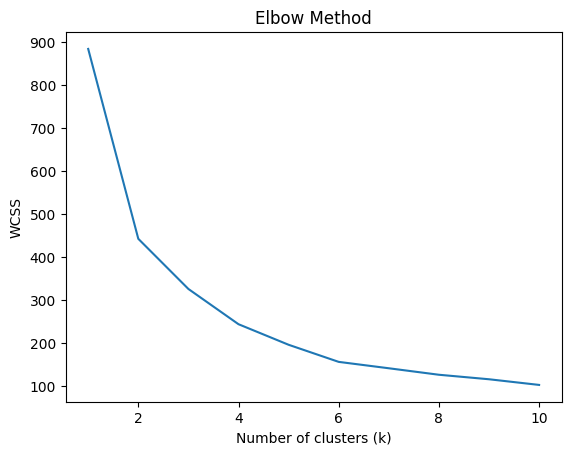

In [154]:
# define the range of k to test
k_values = range(1, 11)

# initialize an empty list to hold the WCSS for each k
wcss = []

# for each k, fit a k-means model and add the WCSS to the wcss list
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

# plot the results
plt.plot(k_values, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [155]:
# using the KneeLocator to help identify the optimum clusters

!pip install kneed
from kneed import KneeLocator

# the data of the elbow plot
k_values = range(1, 11)
inertia_values = wcss

# find the knee point (elbow point)
kn = KneeLocator(k_values, inertia_values, curve='convex', direction='decreasing')

print(f'The optimal number of clusters is {kn.knee}')

The optimal number of clusters is 3


# 03. Fitting K-Means Model

In [156]:
# optimal number of clusters identified above
optimal_clusters = 3

# initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

# fit the model to your data
kmeans.fit(df_std)

# get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# add these cluster assignments back to dataframe
filtered_df['cluster'] = cluster_assignments

In [157]:
# calculating number of data points in each cluster
filtered_df['cluster'].value_counts()

1    120
0     58
2     43
Name: cluster, dtype: int64

In [158]:
# checking the mean values of each feature within each cluster
filtered_df.groupby('cluster').mean()

,bottle_volume_(ml),state_bottle_cost,total_bottles_sold,cities_count,store_count
cluster,,,,,
0,750.0,23.439483,1004.517241,43.155172,85.827586
1,750.0,27.555917,132.766667,10.083333,14.808333
2,750.0,53.702791,107.441860,16.651163,27.418605


# 04. Visualising Data

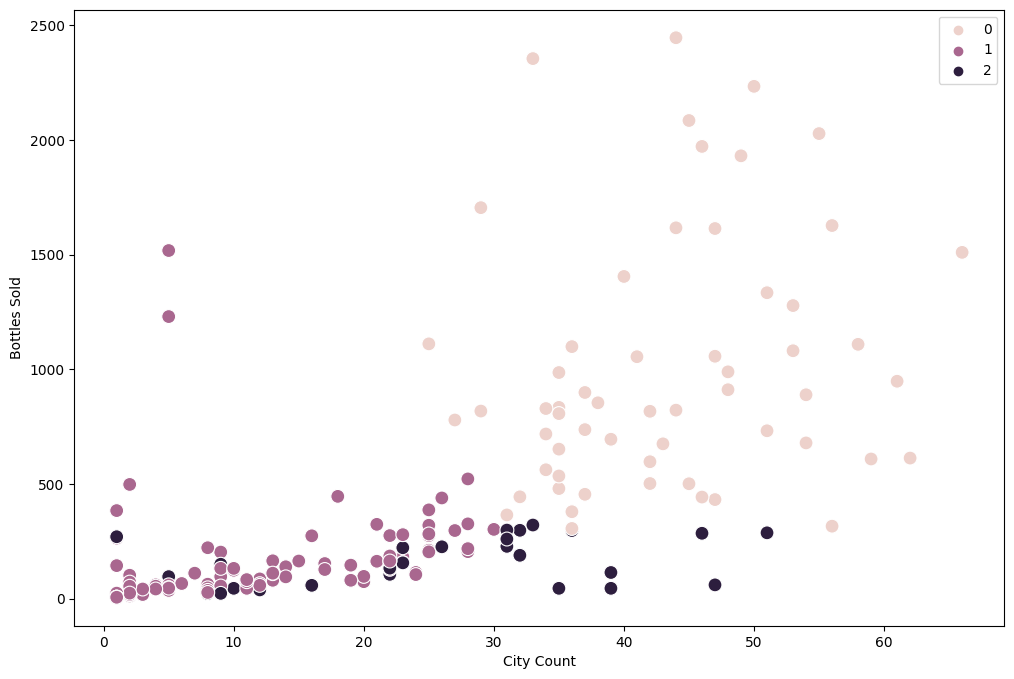

In [160]:
# plot the clusters for the "	cities_count and "total_bottles_sold" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=filtered_df['cities_count'], y=filtered_df['total_bottles_sold'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('City Count')
plt.ylabel('Bottles Sold')
plt.show()

As the city count increases so to does the number of bottles sold. Cluster 0 consists of tequila brans that are located in a large number of cities, cluster 1 tends to be located in the least number of cities with cluster 2 falling in the middle.

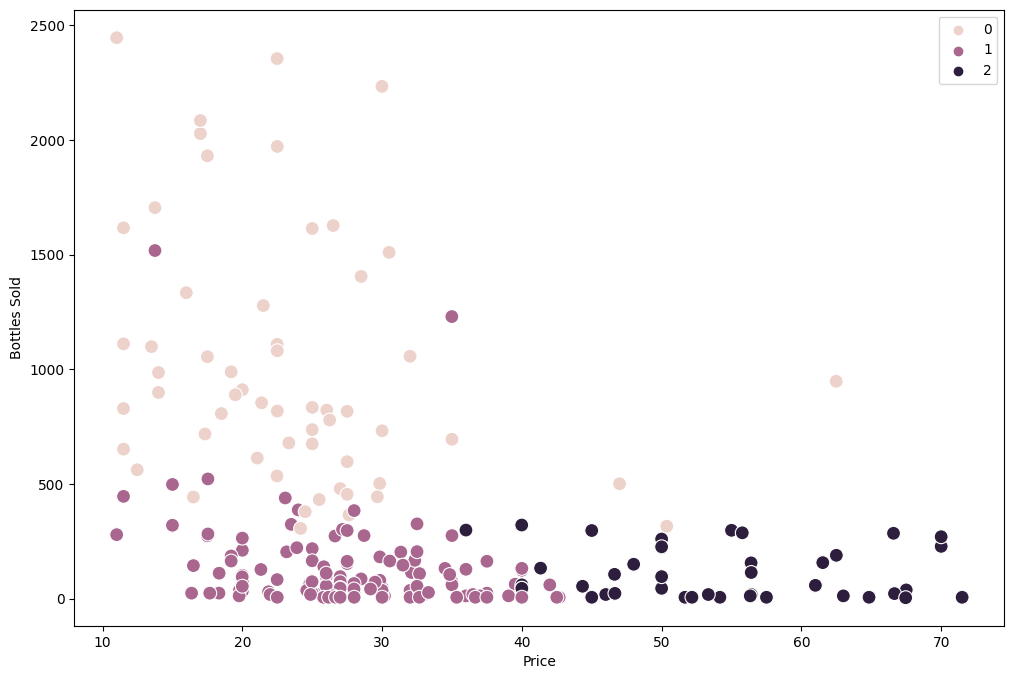

In [161]:
# plot the clusters for the "state_bottle_cost" and "total_bottles_sold" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=filtered_df['state_bottle_cost'], y=filtered_df['total_bottles_sold'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Bottles Sold')
plt.show()

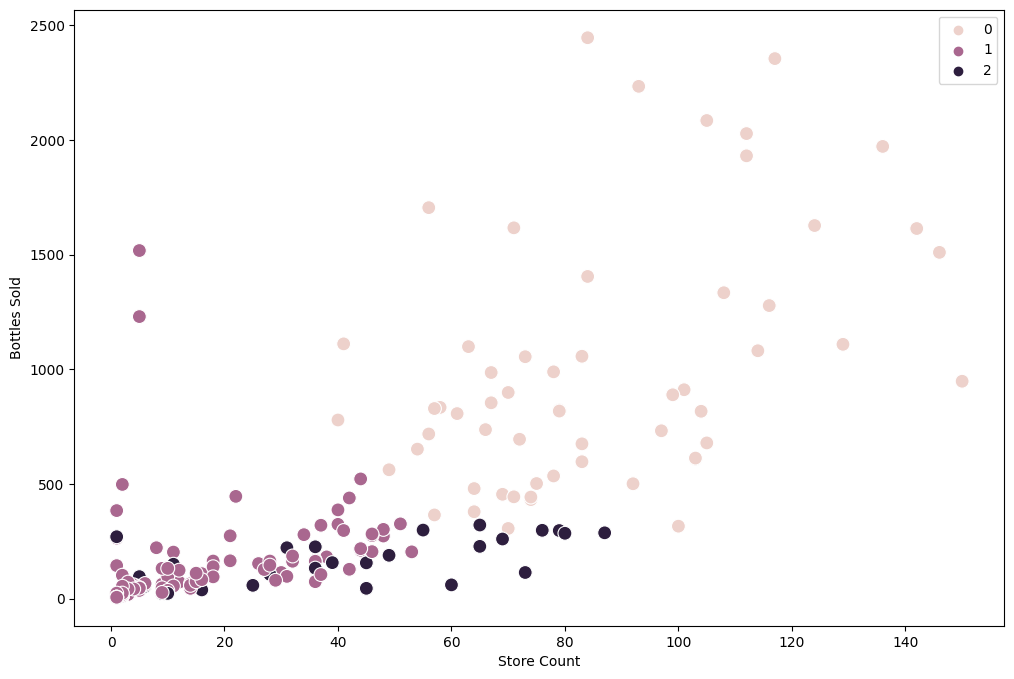

In [162]:
# plot the clusters for the "store_count and "total_bottles_sold" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=filtered_df['store_count'], y=filtered_df['total_bottles_sold'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Store Count')
plt.ylabel('Bottles Sold')
plt.show()

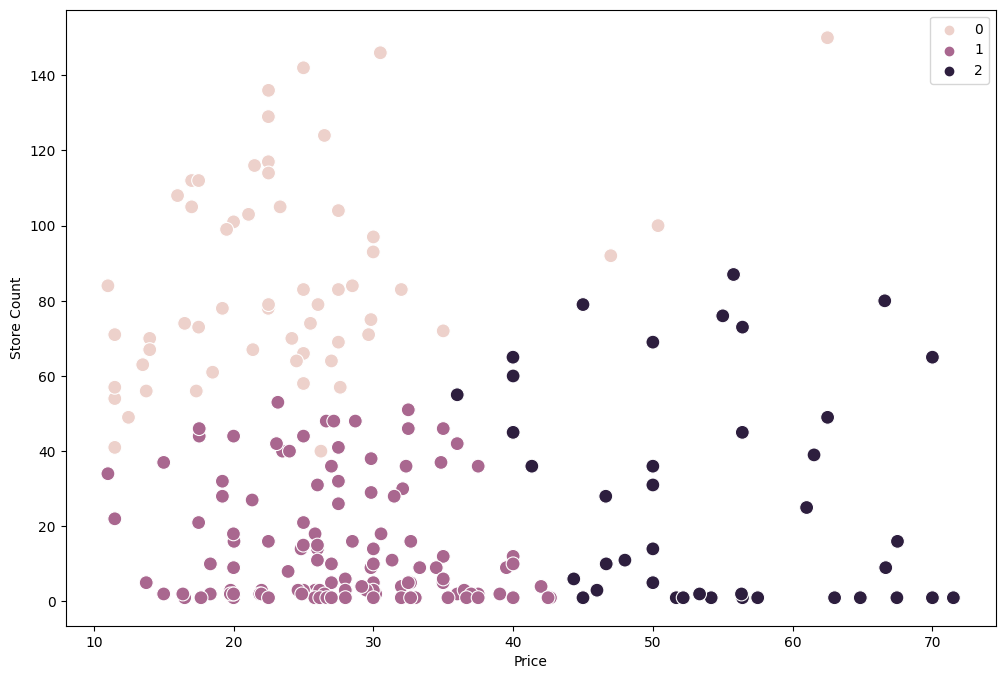

In [163]:
# plot the clusters for the "store_count" and "state_bottle_cost" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=filtered_df['state_bottle_cost'], y=filtered_df['store_count'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Store Count')
plt.show()

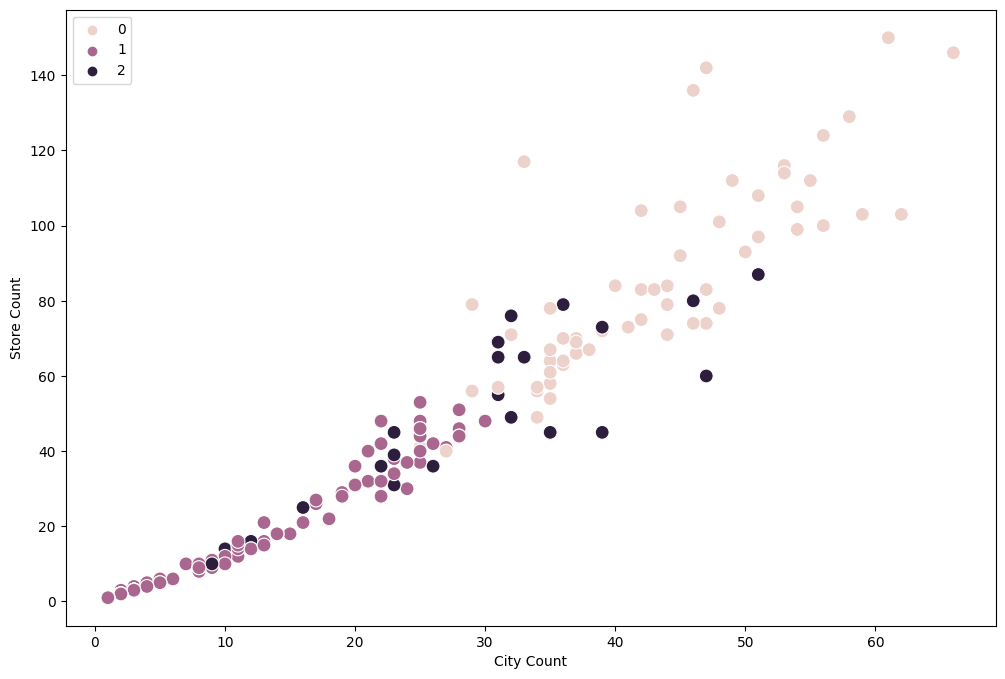

In [164]:
# plot the clusters for the "store_count" and "cities_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=filtered_df['cities_count'], y=filtered_df['store_count'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('City Count')
plt.ylabel('Store Count')
plt.show()

# 04. Cluster Descriptions


In [168]:
#find the top 3 'total_bottles_sold' in each cluster
top_3 = (filtered_df.groupby('cluster')['total_bottles_sold']
         .nlargest(3)
         .reset_index())

# merge the top 3 with the original DataFrame to get the other columns
result = top_3.merge(filtered_df, on=['cluster', 'total_bottles_sold'])

# display the result
print(result[['item_description', 'cluster', 'total_bottles_sold']])

                                 item_description  cluster  total_bottles_sold
0                        SAUZA CIEN ANOS REPOSADO        0                2446
1                                 DELEON REPOSADO        0                2355
2                           HERRADURA ULTRA ANEJO        0                2234
3                 CORAZON REPOSADO BUY THE BARREL        1                1518
4  DON JULIO REPOSADO PRIVATE CASK BUY THE BARREL        1                1230
5                   INFUSED TEQUILA JALAPENO LIME        1                 522
6                           CORRALEJO EXTRA ANEJO        2                 321
7                    NUMBER JUAN TEQUILA REPOSADO        2                 299
8                        CINCORO REPOSADO TEQUILA        2                 298


### Cluster 0: Mainstream, Widely Available, and Popular
Brands:
- **SAUZA CIEN ANOS REPOSADO**
- **DELEON REPOSADO**
- **HERRADURA ULTRA ANEJO**

**Description:**
These brands are indicative of popular, mainstream tequilas. The sales numbers for these brands are high, suggesting they are well-liked and widely purchased. The brands listed here, especially Herradura and DeLeon, are renowned and have a history in the tequila market. This cluster represents tequilas that are perhaps the most accessible both in terms of price and availability.

### Cluster 1: Niche or Specialized, Premium, with Limited Availability
Brands:
- **CORAZON REPOSADO BUY THE BARREL**
- **DON JULIO REPOSADO PRIVATE CASK BUY THE BARREL**
- **INFUSED TEQUILA JALAPENO LIME**

**Description:**
Brands in this cluster, such as Don Julio's special "Buy the Barrel" edition, suggest a more premium or specialized product. The inclusion of an "Infused Tequila" also suggests that this category might cater to a more specific audience looking for unique flavors or experiences. These tequilas could be sought after for their distinctiveness, perhaps limited editions or specially crafted versions. Their sales figures, while not as high as Cluster 0, are still significant, suggesting they have a dedicated audience.

### Cluster 2: Upscale, Premium Priced, with Moderate Distribution
Brands:
- **CORRALEJO EXTRA ANEJO**
- **NUMBER JUAN TEQUILA REPOSADO**
- **CINCORO REPOSADO TEQUILA**

**Description:**
Brands in Cluster 2 are indicative of premium, upscale tequilas. The presence of "Extra Anejo" in Corralejo suggests a longer aging process, which typically commands a higher price point. Cincoro, for example, is a newer luxury brand in the tequila market. These tequilas are for enthusiasts or those willing to spend a bit more for a premium experience. Their distribution is moderate, making them available but perhaps not as ubiquitous as the mainstream brands in Cluster 0.

**Final Summary:**
- **Cluster 0:** Brands that are well-established, widely available, and cater to a broad audience.
- **Cluster 1:** Unique, specialized brands that might be limited editions or offer a distinct flavor profile, targeting a dedicated or niche audience.
- **Cluster 2:** Upscale brands that promise a luxury experience, targeted towards enthusiasts and connoisseurs.

In [171]:
# saving data for Tableau visualisations
filtered_df.to_csv("/content/drive/MyDrive/Iowa Liquor /Prepared Data/k_means.csv", index=False)